***Imporint Libraries***


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

***Spliting for trainging and testing***

In [24]:
# Load the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


***Reshaping the values between 0 - 1***

In [25]:
m = X_train.shape[0]



In [26]:

# Reshape and normalize the data
X_train = X_train / 255.0
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test / 255.0
X_test = X_test.reshape(X_test.shape[0], -1)

In [27]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

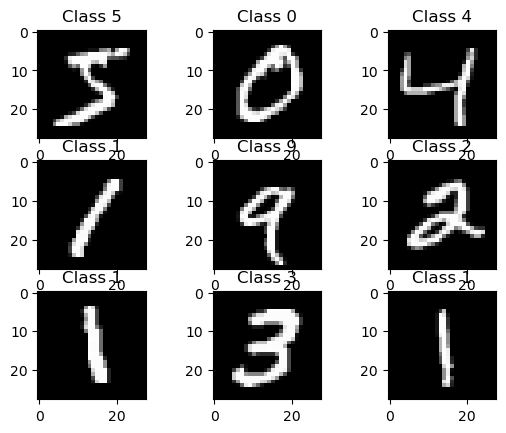

In [28]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[i]))
    

***Getting readin for trainig the model***

In [29]:
# Define the model
model = Sequential([
    Dense(128, input_shape=(784,), activation="relu"),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Train the model
batch_size = 50
epochs = 5
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/5


2023-11-02 03:12:54.841043: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1200/1200 [==============================] - 9s 6ms/step - loss: 0.2535 - accuracy: 0.9258
Epoch 2/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1032 - accuracy: 0.9694
Epoch 3/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0706 - accuracy: 0.9778
Epoch 4/5
1200/1200 [==============================] - 7s 5ms/step - loss: 0.0540 - accuracy: 0.9832
Epoch 5/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0430 - accuracy: 0.9854


# ***Building NN***

In [31]:
def init_params():
    w1 = np.random.randn(10, 784) - 0.5
    b1 = np.random.randn(10, 1) - 0.5
    w2 = np.random.randn(10, 10) - 0.5
    b2 = np.random.randn(10, 1) - 0.5
    return w1, b1, w2, b2

In [32]:
def forward_prop(X, W1, b1, W2, b2):
    Z1 = W1.dot(X.T) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLu(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

In [33]:
def one_hot(Y):
    Y_one_hot = np.zeros((Y.size, Y.max()+1))
    Y_one_hot[np.arange(Y.size), Y] = 1
    Y_one_hot = Y_one_hot.T
    return Y_one_hot

In [61]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLu_deriv(Z1)
    dW1 = 1/m * dZ1.dot(X)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def ReLu_deriv(Z):
    return Z > 0


In [35]:
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate):
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    return w1, b1, w2, b2

In [37]:
def save_weights_values_csv(w1, b1, w2, b2):
    np.savetxt("w1.csv", w1, delimiter=",")
    np.savetxt("b1.csv", b1, delimiter=",")
    np.savetxt("w2.csv", w2, delimiter=",")
    np.savetxt("b2.csv", b2, delimiter=",")

In [38]:
def gradient_descent(X, Y, learning_rate, epochs):
    w1, b1, w2, b2 = init_params()
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(X, w1, b1, w2, b2)
        dw1, db1, dw2, db2 = backward_prop(Z1, A1, Z2, A2, w1, w2, X, Y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate)
        if i % 100 == 0:
            print("Epoch", i)
            predictions = get_predictions(A2)
            print("Train Accuracy:", accuracy_score(predictions, Y))
    print("Final Accuracy:", accuracy_score(predictions, Y))
    save_weights_values_csv(w1, b1, w2, b2)
    return w1, b1, w2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def accuracy_score(predictions, Y):
    print('pred: ', predictions, 'actual', Y)
    return np.sum(predictions == Y) / Y.size


In [63]:
#run the model
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 0.1, 400)

Epoch 0
pred:  [3 3 3 ... 3 3 3] actual [5 0 4 ... 5 6 8]
Train Accuracy: 0.10218333333333333
Epoch 100
pred:  [3 3 3 ... 3 3 3] actual [5 0 4 ... 5 6 8]
Train Accuracy: 0.10218333333333333
Epoch 200
pred:  [3 3 3 ... 3 3 3] actual [5 0 4 ... 5 6 8]
Train Accuracy: 0.10218333333333333
Epoch 300
pred:  [3 3 3 ... 3 3 3] actual [5 0 4 ... 5 6 8]
Train Accuracy: 0.10218333333333333
pred:  [3 3 3 ... 3 3 3] actual [5 0 4 ... 5 6 8]
Final Accuracy: 0.10218333333333333


@_***Muhammad Sameer Akram***_